# Random Matrices in Python

As the name implies, <a href="https://en.wikipedia.org/wiki/Random_matrix" target="_blank">random matrices</a> are basically matrices with randomly generated elements. They have been successfully applied to various fields, such as nuclear physics, neuroscience and multivariate statistical analysis. In particular, the distributions of symmetrical random matrix eigenvalues have some interesting properties which we will explore in this post.

## The Wigner Semicircle and Surmise

According to random matrix theory, the distribution of the eigenvalues of an ensemble of symmetric random matrices can be approximated by the <a href="https://en.wikipedia.org/wiki/Wigner_semicircle_distribution" target="_blank">Wigner semicircle</a>.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Wigner Semi Circle
R = 2
x = np.linspace(-R, R, 1000)
semicircle = 2 / (R**2 * np.pi) * np.sqrt(R**2 - x**2)

Correspondingly, the distribution of the eigenvalue spacings of an ensemble of symmetric random matrices can be approximated by the <a href="https://en.wikipedia.org/wiki/Wigner_surmise" target="_blank">Wigner surmise</a>. The Wigner surmise was originally developed to describe the the spaces between points in the spectra of the nuclei of heavy atoms (i.e. radioactive atoms such as Uranium).

In [2]:
# Wigner Surmise
s = np.linspace(0, 3, 1000)
surmise = np.pi * s / 2 * np.exp(-np.pi * s**2 / 4)  

## The Grand Orthogonal Ensemble

Now that we have these two properties on hand, all we need to do is to create some random matrices to try out! First of all, we have the Grand Orthogonal Ensemble which models Hamiltonians with time reversal symmetry.

In [3]:
def goe_eigs(N = 10):
    # Grand Orthogonal Ensemble: 
    # Hamiltonians with time reversal symmetry
    A = np.random.randn(N, N)
    B = 2**-0.5 * (A + A.T)
    D = np.linalg.eigvals(B)  
    return np.real(D)

## The Grand Unified Ensemble

Next, we have the Grand Unified Ensemble which models Hamiltonians without time reversal symmetry.

In [4]:
def gue_eigs(N = 10):
    # Grand Unified Ensemble: 
    # Hamiltonians without time reversal symmetry
    A = np.random.randn(N, N) + 1j * np.random.randn(N, N) 
    B = 2**-1 * (A + np.conj(A.T)) 
    D = np.linalg.eigvals(B)  
    return np.real(D)

## The Symmetric Bernoulli Ensemble

Finally, we have the Symmetric Bernoulli Ensemble which are random sign matrices which are constrained to be symmetric.

In [5]:
def bernoulli_eigs(N = 10):
    # Symmetric Bernoulli Ensemble
    B = np.zeros([N, N])
    for i in range(N):
        for j in range(N):
            if i >= j & i != j:
                x = np.random.random()
                if x <= 0.5:
                    B[i][j] = 1
                    B[j][i] = 1
                else:
                    B[i][j] = -1
                    B[j][i] = -1
    D = np.linalg.eigvals(B) 
    return np.real(D)

## Eigenvalues of a Random Matrix

For the time being, we will explore the the eigenvalue distribution of the Grand Orthogonal Ensemble. Using the code below, we generate 1000 different symmetric random matrices with dimensions of 10 × 10, and compute the spacings between the eigenvalues.

In [6]:
n_matrices = 1000
N = 10   

# Generate eigenvalues from 1000 different 10×10 matrices: 
eig = np.zeros([n_matrices, N]) 
for i in range(n_matrices):
    eig[i, :] = goe_eigs(N) 
#  Don't forget to normalize the eigenvalues!
eig = eig / np.sqrt(N) 

# Obtain eigenvalue spacing:
# diff and sort operates row-wise by default
spacing = np.diff(np.sort(eig)) 
# np.mean operates over all matrix elements
spacing = spacing / np.mean(spacing) 

The distribution of the eigenvalues can be approximated by the Wigner semicircle.

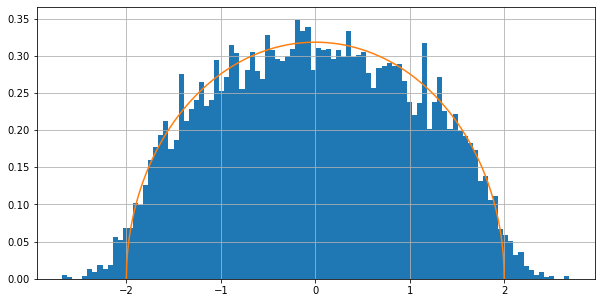

In [7]:
plt.figure(figsize = (10, 5))
plt.hist(eig.ravel(), 100, density = True)
plt.plot(x, semicircle)
plt.grid(True)
plt.show()

The distribution of the eigenvalue spacings can be approximated by the Wigner surmise. This corresponds to the spaces between points in the spectra of the nuclei of heavy atoms!

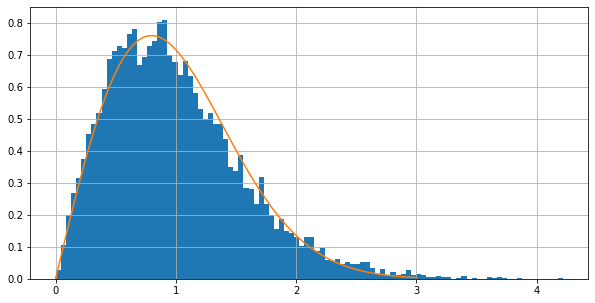

In [8]:
plt.figure(figsize = (10, 5))
plt.hist(spacing.ravel(), 100, density = True)
plt.plot(s, surmise)
plt.grid(True)
plt.show()